# Feature Engineering

In [116]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def get_data(download=False):
    if download:
        response=requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/json/')
    if download and response.status_code==200:
        s=json.loads(response.text,encoding='utf-8',strict=False)
        data=pd.DataFrame(s['records'])
        data.to_csv('covid_data.csv')
    else:
        data=pd.read_csv('covid_data.csv')
    return data

data=get_data(True)

In [117]:
data['dateRep']=pd.to_datetime(data['dateRep'],dayfirst=True)
data['countriesAndTerritories'] = data['countriesAndTerritories'].astype('category')
data['geoId'] = data['geoId'].astype('category')
data['countryterritoryCode'] = data['countryterritoryCode'].astype('category')
data['continentExp'] = data['continentExp'].astype('category')
data.drop(['day','month','year'],axis=1,inplace=True)

In [118]:
latin_america=data.loc[data['continentExp']=='America']

In [32]:
latin_america.dtypes

Unnamed: 0                          int64
dateRep                    datetime64[ns]
cases                               int64
deaths                              int64
countriesAndTerritories          category
geoId                            category
countryterritoryCode             category
popData2019                       float64
continentExp                     category
dtype: object

In [119]:
grouped_df=latin_america.groupby(['countriesAndTerritories','dateRep'],observed=True,sort=['dateRep'])['cases'].mean().dropna()

In [92]:
grouped_df['Chile'].describe()

count      114.000000
mean      2272.491228
std       3834.446321
min          1.000000
25%        301.750000
50%        766.000000
75%       3964.000000
max      36179.000000
Name: cases, dtype: float64

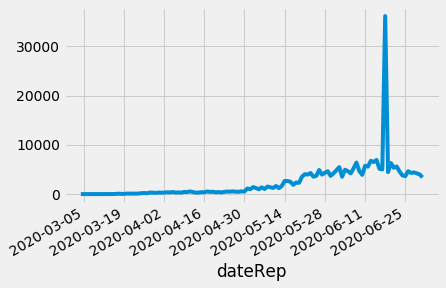

In [120]:
grouped_df['Chile'].plot()

In [121]:
removed_outliers = grouped_df['Chile'].between(0, grouped_df['Chile'].quantile(.95))

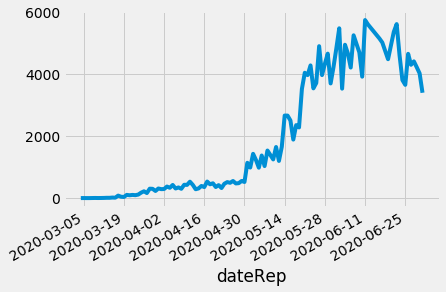

In [122]:
grouped_df['Chile'][removed_outliers].plot()

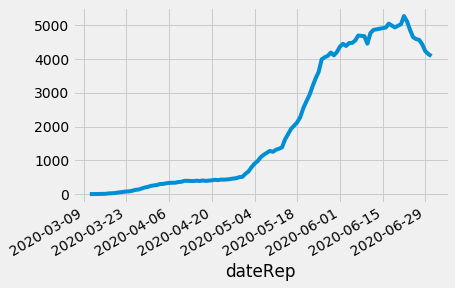

In [123]:
grouped_df['Chile'][removed_outliers].rolling(7).mean().plot()

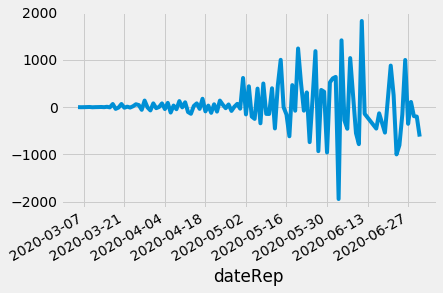

In [124]:
grouped_df['Chile'][removed_outliers].diff().plot()

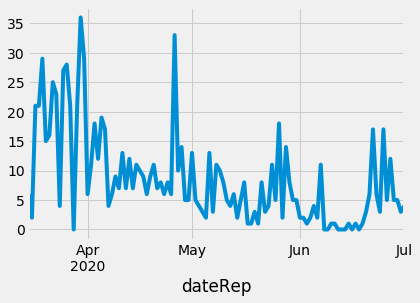

In [125]:
grouped_df['Uruguay'].plot()

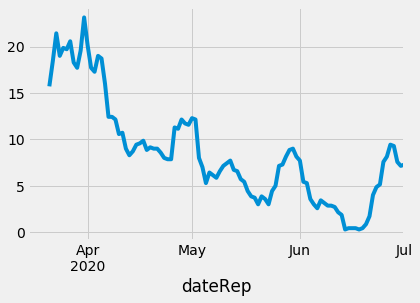

In [126]:
grouped_df['Uruguay'].rolling(7).mean().plot()

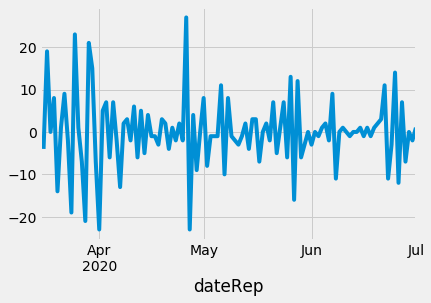

In [127]:
grouped_df['Uruguay'].diff().plot()

In [128]:
for c in latin_america.countriesAndTerritories.unique():
    print(c)

Anguilla
Antigua_and_Barbuda
Argentina
Aruba
Bahamas
Barbados
Belize
Bermuda
Bolivia
Bonaire, Saint Eustatius and Saba
Brazil
British_Virgin_Islands
Canada
Cayman_Islands
Chile
Colombia
Costa_Rica
Cuba
Curaçao
Dominica
Dominican_Republic
Ecuador
El_Salvador
Falkland_Islands_(Malvinas)
Greenland
Grenada
Guatemala
Guyana
Haiti
Honduras
Jamaica
Mexico
Montserrat
Nicaragua
Panama
Paraguay
Peru
Puerto_Rico
Saint_Kitts_and_Nevis
Saint_Lucia
Saint_Vincent_and_the_Grenadines
Sint_Maarten
Suriname
Trinidad_and_Tobago
Turks_and_Caicos_islands
United_States_of_America
United_States_Virgin_Islands
Uruguay
Venezuela
